In [2]:
#importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing a dataset directly from a URL
df = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/refs/heads/main/heart_disease.csv')

# Display the first few rows of the DataFrame
df


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True) #remove the 'Unnamed: 0' column from the dataset
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.describe() #dedcribe the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isna().sum() #checking is there any null in dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

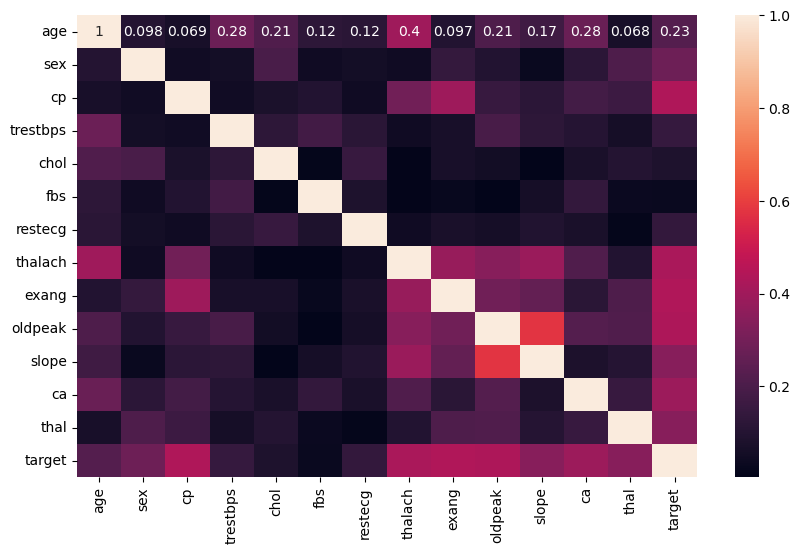

In [7]:
df_corr = df.corr().abs() # Calculate the absolute correlation matrix for the DataFrame
plt.figure(figsize=(10,6)) #set the size of map
sns.heatmap(df_corr, annot=True) #generate the heatmap for visulaize the correlation matrix
plt.show() #display the plot

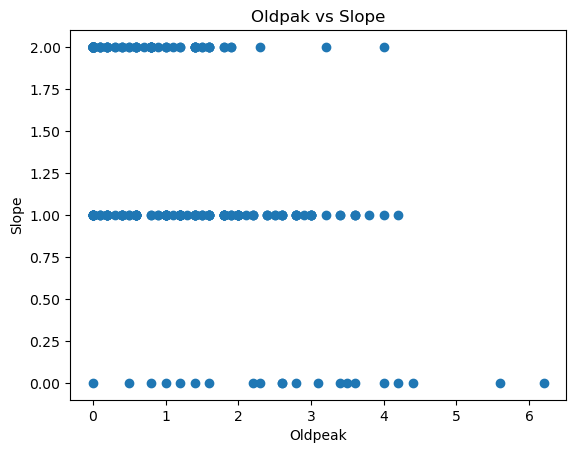

In [8]:
#creating a scatter plot to visualize the relationship between oldpeak and slope
plt.scatter(df.oldpeak,df.slope) 
plt.xlabel('Oldpeak') #label the x-axis as Oldpeak
plt.ylabel('Slope') #label the y_axis as slope
plt.title('Oldpak vs Slope') #label the title as Oldpak vs Slope
plt.show() #show the plot

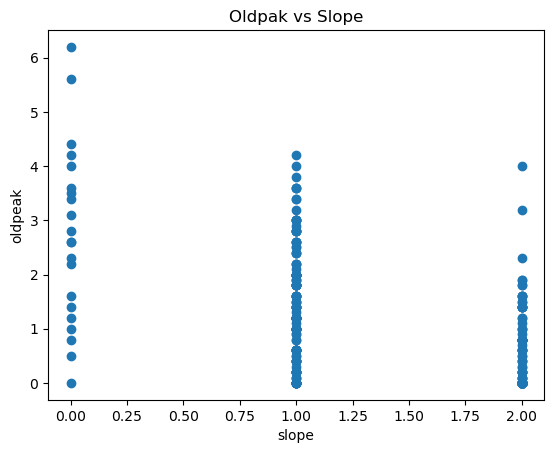

In [9]:
#to self understanding ploting the cross axis
plt.scatter(df.slope,df.oldpeak)
plt.xlabel('slope')
plt.ylabel('oldpeak')
plt.title('Oldpak vs Slope')
plt.show()

In [16]:
df.drop(['target'],axis=1).corrwith(df.target) # Calculate the correlation of each feature with the target variable


age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

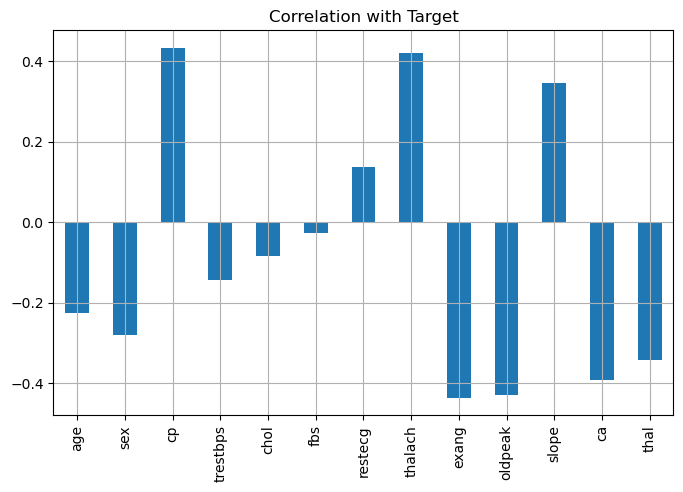

In [10]:
#Visualize the correlation 

# Calculate the correlation of each feature with the target variable
df.drop('target', axis=1).corrwith(df.target).plot(
    kind='bar',       # Plot as a bar chart
    grid=True,        # Add a grid for better readability
    figsize=(8, 5),   # Set the figure size to 8x5 inches
    title='Correlation with Target'  # Title for the bar plot
)

# Display the plot
plt.show()

In [13]:
#model building using select percentile features
from sklearn.feature_selection import SelectPercentile,chi2

#when we apply chi2, we get p values for all features based on the p-values, it will select upto 80% of features
#If P-value <0.05, it will reject null hypothesis, default null hypothesis is, there is no relationb/w features and target

In [14]:
#Instantiate select percentile and fit (feature and label)

# Define features (X) by dropping the 'target' column and set the target variable (y)
x = df.drop(['target'], axis=1)
y = df.target

# Initialize the SelectPercentile object to select features based on chi-squared scores
SPercentile = SelectPercentile(score_func=chi2, percentile=80)

# Fit the SelectPercentile model to the feature and target data
SPercentile = SPercentile.fit(x, y)



In [15]:
#Seperate the features to check p-values

# Retrieve the indices of the selected features
columns = SPercentile.get_support(indices=True)
print('Feature Index=', columns)

# Use the indices to get the names of the selected features from the original feature set
features = x.columns[columns]
print('Features=', list(features))


Feature Index= [ 0  1  2  3  4  7  8  9 10 11]
Features= ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']


So now check in the graph bar 5, 6 features is drop out using the 80% percentile because it having the less contribution with label

In [16]:
# Create a DataFrame to display feature names, chi-squared scores, and p-values
df_scores = pd.DataFrame({
    'features': x.columns,              # List of feature names from the original dataset
    'chi2score': SPercentile.scores_,   # Chi-squared scores of each feature
    'PValue': SPercentile.pvalues_      # p-values of each feature's chi-squared score
})


In [17]:
# Sort the DataFrame by the 'chi2score' column in descending order
df_scores.sort_values(by='chi2score', ascending=False) # Chi2scoe and p-value are apposite

#means higher the chi2score lower the p-value (focus on e-43, this is very lower)

,features,chi2score,PValue
7,thalach,188.320472,7.395102e-43
9,oldpeak,72.644253,1.552583e-17
11,ca,66.440765,3.605677e-16
2,cp,62.598098,2.534982e-15
8,exang,38.914377,4.428074e-10
4,chol,23.936394,9.957148e-07
0,age,23.286624,1.395673e-06
3,trestbps,14.823925,1.180286e-04
10,slope,9.804095,1.741237e-03
1,sex,7.576835,5.912318e-03


In [18]:
df_scores.sort_values(by='chi2score', ascending=True)

,features,chi2score,PValue
5,fbs,0.202934,6.523632e-01
6,restecg,2.978271,8.438939e-02
12,thal,5.791853,1.610061e-02
1,sex,7.576835,5.912318e-03
10,slope,9.804095,1.741237e-03
3,trestbps,14.823925,1.180286e-04
0,age,23.286624,1.395673e-06
4,chol,23.936394,9.957148e-07
8,exang,38.914377,4.428074e-10
2,cp,62.598098,2.534982e-15


In [19]:
#create subset of selected features

x = df[features] # x is having 80% of the features, now this is our final dataset
y = df.target

#we can use this dataset for model bui;ding

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

In [22]:
#write one function and call as many times to check accuraccy score of different model

def metric_score(clf, x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n=========Train Result==========")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred = clf.predict(x_test)
        print("\n=========Test Result==========")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print("\n\n Test CLasifiction Report \n", classification_report(y_test, pred,digits=2))
              
            

In [23]:
#initiate Gradient Boosting Classifier

gbdt_clf = GradientBoostingClassifier()

In [24]:
#train the model

gbdt_clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [25]:
metric_score(gbdt_clf, x_train,x_test,y_train,y_test, train=True)
metric_score(gbdt_clf, x_train,x_test,y_train,y_test, train=False)


=========Train Result==========
Accuracy Score:99.56%

=========Test Result==========
Accuracy Score:80.26%


 Test CLasifiction Report 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79        35
           1       0.82      0.80      0.81        41

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



As checked training score is 100% and testing score is 76.32% there is room for improvement in training score by using the tuning the parameter

#### HyperParameter Tuning

If we will take GridSearchCV with range function, it will take lot of time because of range and step size.
So we are using Randomized Search CV with range function

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
# Define a dictionary of hyperparameters to tune for a machine learning model
grid_param = {
    'max_depth': range(4, 8),                     # Maximum depth of the tree (values from 4 to 7)
    'min_samples_split': range(2, 8, 2),          # Minimum number of samples required to split an internal node (even numbers from 2 to 6)
    'n_estimators': range(20, 80, 10),            # Number of trees in the forest (values from 20 to 70, in steps of 10)
    'learning_rate': np.arange(0.1, 0.3)          # Learning rate for the model (values between 0.1 and 0.3, step size of 0.01 by default)
}


In [30]:
# Set up RandomizedSearchCV for hyperparameter tuning
grid = RandomizedSearchCV(
    GradientBoostingClassifier(),  # The model to optimize (Gradient Boosting Classifier)
    cv=5,                          # Number of cross-validation folds (5-fold CV)
    param_distributions=grid_param  # Dictionary of hyperparameters to sample from
)

In [31]:
# Fit the RandomizedSearchCV object to the training data
grid.fit(x_train, y_train)

# Retrieve the best parameters found during the search
best_parameters = grid.best_params_


In [32]:
# Initialize the Gradient Boosting Classifier with specified hyperparameters
gbdt_clf = GradientBoostingClassifier(
    n_estimators=40,          # Number of boosting stages to be run (40 trees)
    min_samples_split=3,      # Minimum number of samples required to split an internal node (3)
    max_depth=3,              # Maximum depth of the individual regression estimators (3)
    learning_rate=0.1         # Learning rate shrinks the contribution of each tree (0.1)
)

# Fit the model to the training data
gbdt_clf.fit(x_train, y_train)


GradientBoostingClassifier(min_samples_split=3, n_estimators=40)

In [33]:
metric_score(gbdt_clf, x_train,x_test,y_train,y_test, train=True)
metric_score(gbdt_clf, x_train,x_test,y_train,y_test, train=False)


=========Train Result==========
Accuracy Score:95.59%

=========Test Result==========
Accuracy Score:85.53%


 Test CLasifiction Report 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.88      0.85      0.86        41

    accuracy                           0.86        76
   macro avg       0.85      0.86      0.85        76
weighted avg       0.86      0.86      0.86        76

